Import library

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from matplotlib.cbook import boxplot_stats

Import data

In [130]:
df = pd.read_csv('../data/dataset_concurso.csv', encoding='ISO-8859-1')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70710 entries, 0 to 164157
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿IdConcurso                  70710 non-null  object 
 1   IdFase                         70710 non-null  object 
 2   Orden                          70710 non-null  int64  
 3   IdEscuela                      70710 non-null  object 
 4   NivelEscolarCode               70710 non-null  int64  
 5   Grado                          70710 non-null  object 
 6   IdEstudiante                   70710 non-null  object 
 7   IdMaratonFaseEstudiante        70710 non-null  object 
 8   SeleccionadoParaSiguienteFase  70710 non-null  int64  
 9   IdMaratonFaseTask              70710 non-null  object 
 10  IsPrueba                       70710 non-null  int64  
 11  Orden.1                        70710 non-null  int64  
 12  IsActivo                       70710 non-null

Text(0, 0.5, 'Calificacion')

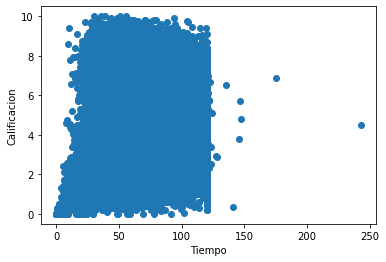

In [131]:
dfExamen = df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==0)

dfExamen = dfExamen.dropna()
dfExamen.drop_duplicates(keep='first', inplace=True)

# scatterplot of inputs data
plt.scatter(dfExamen['Tiempo'], dfExamen['Calificacion'])
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')


In [132]:
# Acotamos la información
dfCalificacionesTiempo = dfExamen[['Tiempo', 'Calificacion']]
X = dfCalificacionesTiempo.values

Modeling

In [133]:
# Inicializamos el modelo
# Definimos la k en 5, podemos ajustar de acuerdo al modelo
nbrs = NearestNeighbors(n_neighbors = 4)


In [134]:
# Ajustamos el modelo
nbrs.fit(X)

NearestNeighbors(n_neighbors=4)

In [135]:
# Obtenemos distancias e indices de los k-vecinos del modelo
distances, indexes = nbrs.kneighbors(X)
distances, indexes

(array([[0.        , 0.06      , 0.06324555, 0.09055385],
        [0.        , 0.        , 0.03      , 0.06      ],
        [0.        , 0.04123106, 0.12529964, 0.12649111],
        ...,
        [0.        , 0.02      , 0.05      , 0.07211103],
        [0.        , 0.02      , 0.07071068, 0.08944272],
        [0.        , 0.06      , 0.10049876, 0.13152946]]),
 array([[    0, 20201,  5592,  1227],
        [    1,  1751, 22773, 11795],
        [    2,  6630, 22257, 23072],
        ...,
        [24123, 13801, 10649, 23883],
        [24124,  8425,  1341, 20782],
        [24125,  9698, 15204, 19867]]))

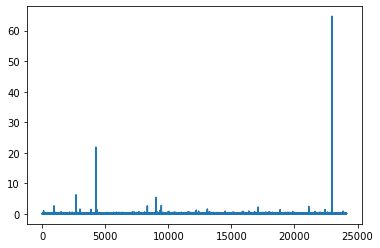

In [136]:
# Graficamos la media de las k-distancias para cada uno de los datos
plt.plot(distances.mean(axis = 1))

In [137]:
# Definimos una k-distancia para considerar al dato como outlier, en este caso utilizamos el 2
outlier_index = np.where(distances.mean(axis = 1) > 1)
outlier_index

(array([  111,   933,  2683,  2998,  3859,  3873,  4261,  4353,  4363,
         8336,  9038,  9322,  9442, 12207, 13094, 17120, 18861, 21133,
        22425, 22981]),)

In [138]:
# Filtramos outliers
outlier_values = dfCalificacionesTiempo.iloc[outlier_index]
outlier_values

,Tiempo,Calificacion
762,23.07,9.71
6318,147.00,4.79
18183,135.63,6.52
20253,9.53,8.59
26079,10.63,9.43
26169,123.65,2.50
28875,175.37,6.90
29517,16.55,9.11
29577,121.87,2.33
56655,128.32,2.88


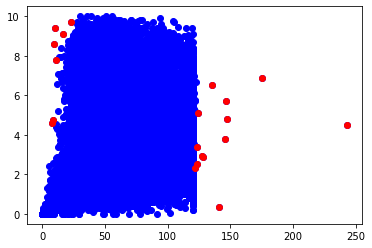

In [139]:
# Graficar datos originales
plt.scatter(dfCalificacionesTiempo["Tiempo"], dfCalificacionesTiempo["Calificacion"], color = "b")
# Graficar outliers
plt.scatter(outlier_values["Tiempo"], outlier_values["Calificacion"], color = "r")

## Detección de anomalías con gráfica de cajas.

Una gráfica de cajas puede ser una forma rápida de obtener anomalías para una sola característica,
veamos que nos muestra de las calificaciones

<AxesSubplot:>

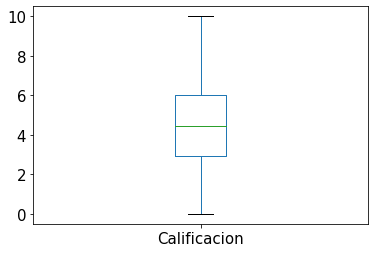

In [140]:
dfExamen.boxplot(['Calificacion'], grid=False, fontsize=15)

Dado que la calificación es un valor altamente discretizado, no vimos un solo valor anómalo.
veamos valores de tiempo, puede darnos resultados más interesantes.

<AxesSubplot:>

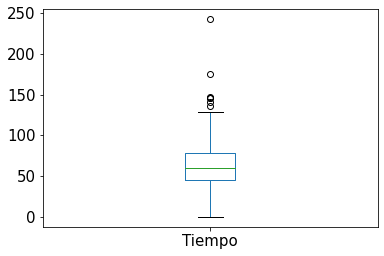

In [141]:
dfExamen.boxplot(['Tiempo'], grid=False, fontsize=15)

Se puede ver que existen anomalías justo en el límite superior de tiempo (120 minutos)
Ahora para encontrar los valores exactos, podemos obtener las anomalías como valores.

In [142]:
outliers = [y for stat in boxplot_stats(dfExamen['Tiempo']) for y in stat['fliers']]
print(outliers)

[147.0, 135.63, 175.37, 140.63, 146.27, 145.67, 242.47]
